<a href="https://colab.research.google.com/github/kn9ck/MAT422/blob/master/HW_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Singular Value Decomposition
**Singular Value Decomposition** is a method of matrix factorization. It will decompose a Matrix $A$ into three matrices: $U, S, V^T$ such that $A = US V^T$ , where $U$ and $V^T$ are orthogonal matrices, and $S$ is a diagonal matrix with singular values.

In [198]:
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import load_digits
from scipy import linalg

A = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])

def svd(A):
  ATA = A.T @ A
  AAT = A @ A.T

  # eigenvalues and eigenvectors for ATA
  eigvals_ATA, eigenvecs_ATA = np.linalg.eig(ATA)
  V = eigenvecs_ATA

  # eigenvalues and eigenvectors for AAT
  eigvals_AAT, eigenvecs_AAT = np.linalg.eig(AAT)
  U = eigenvecs_AAT

  # sort the eigenvalues
  idx = eigvals_AAT.argsort()[::-1]
  eigvals_AAT = eigvals_AAT[idx]
  U = U[:, idx]
  idx = eigvals_ATA.argsort()[::-1]
  eigvals_ATA = eigvals_ATA[idx]
  V = V[:, idx]

  # compute the singular values
  singular_values = np.sqrt(np.maximum(eigvals_ATA,0))

  return U, singular_values, V.T

U, s, Vt = svd(A)

print("Original Matrix", A)
print("Left Singular Vectors", U)
print("Singular Values", s)
print("Right Singular Vectors Transposed", Vt)

#diagonal matrix S
S = np.zeros(A.shape)
S[:len(s),:len(s)] = np.diag(s)

#reconstruct A
A_reconstructed = U @ S @ Vt
print(A_reconstructed)

Original Matrix [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Left Singular Vectors [[-0.14087668  0.82471435 -0.08956703  0.03015777]
 [-0.34394629  0.42626394  0.52217555  0.36741863]
 [-0.54701591  0.02781353 -0.77565003 -0.82531057]
 [-0.75008553 -0.37063688  0.3430415   0.42773417]]
Singular Values [2.54624074e+01 1.29066168e+00 8.67243072e-08]
Right Singular Vectors Transposed [[-0.50453315 -0.5745157  -0.64449826]
 [-0.76077568 -0.05714052  0.64649464]
 [ 0.40824829 -0.81649658  0.40824829]]
[[ 1.          2.00000001  3.        ]
 [ 4.00000002  4.99999996  6.00000002]
 [ 6.99999997  8.00000005  8.99999997]
 [10.00000001 10.99999998 12.00000001]]


# Low Rank Approximation
Low Rank Approximation is a technique based on SVD that is used to represent a matrix using a fewer amount of dimensions while still retaining its general structure.
The idea is to only **keep the largest singular values** and their corresponding singular vectors.  

Original Matrix:
 [[0.2295367  0.12690688 0.33016564 0.46809848]
 [0.97466822 0.23487606 0.93703556 0.81963206]
 [0.38066863 0.60366916 0.1642537  0.25890263]
 [0.04380813 0.79361359 0.68818598 0.92919717]
 [0.29754306 0.26968614 0.95053417 0.35630961]]

Rank-1 Approximation:
 [[0.23658934 0.22318605 0.38074461 0.34524559]
 [0.59012652 0.55669459 0.94969406 0.86114861]
 [0.24091818 0.22726965 0.38771104 0.3515625 ]
 [0.49263122 0.46472261 0.7927943  0.71887751]
 [0.39363231 0.3713322  0.63347478 0.57441227]]


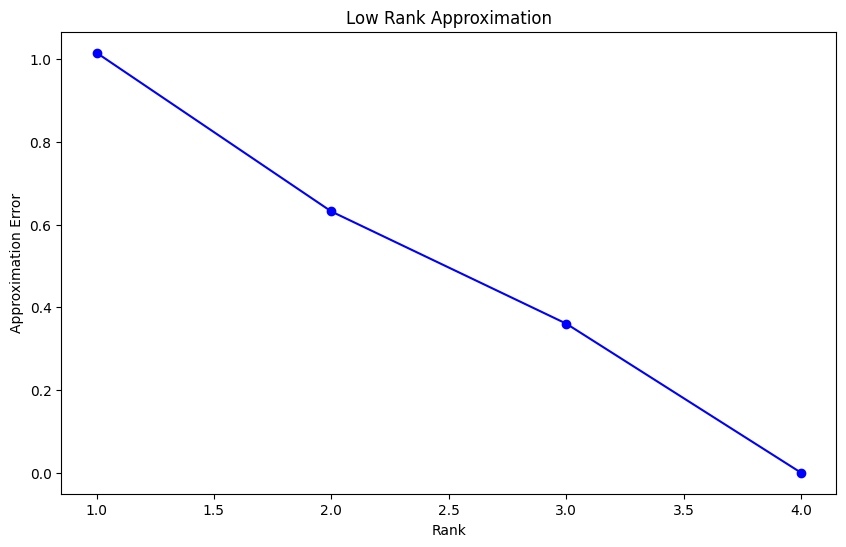

Rank-2 approximation error: 0.6320


In [199]:
A = np.random.rand(5, 4)

#SVD
U, s, VT = linalg.svd(A)

rank = 1
# use only the first singular value to approximate the matrix
rank1_reconstructed = s[rank-1] * np.outer(U[:, rank-1], VT[rank-1, :])

print("Original Matrix:\n", A)
print("\nRank-1 Approximation:\n", rank1_reconstructed)

# Function to reconstruct matrix with given rank
def reconstruct(rank):
  return U[:, :rank] @ np.diag(s[:rank]) @ VT[:rank, :]

# Compute approximations and their errors
ranks = range(1, len(s) + 1)
errors = [np.linalg.norm(A - reconstruct(r)) for r in ranks]

# visualize errors relationship with rank k
plt.figure(figsize=(10, 6))
plt.plot(ranks, errors, 'bo-')
plt.xlabel('Rank')
plt.ylabel('Approximation Error')
plt.title('Low Rank Approximation')
plt.show()

print(f"Rank-2 approximation error: {errors[1]:.4f}")



## Image Compression Using SVD

In [200]:
# compress image with k first singular values
def compress_image(U, S, VT, k):
    S_k = np.diag(S[:k])
    U_k = U[:, :k]
    VT_k = VT[:k, :]

    compressed_image = np.dot(np.dot(U_k, S_k), VT_k)
    return compressed_image

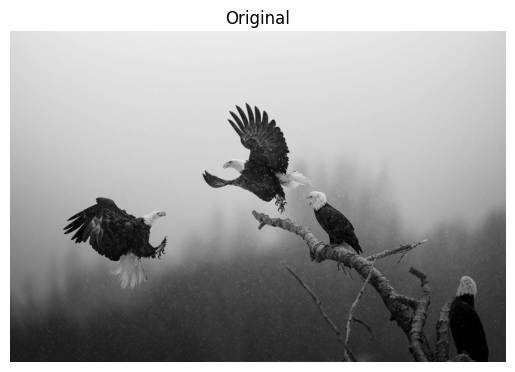

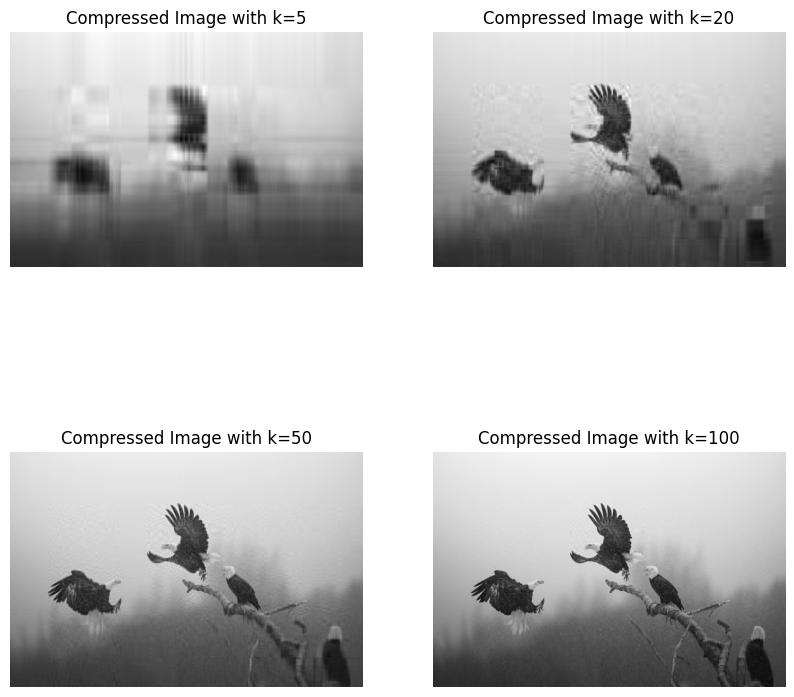

In [201]:
from PIL import Image
image = Image.open('eagle.jpg')
image = image.convert("L")  # 'L' mode for grayscale
image_matrix = np.array(image)

plt.figure()
plt.imshow(image_matrix, cmap="gray")
plt.title("Original")
plt.axis("off")
plt.show()

# svd
U, S, VT = linalg.svd(image_matrix)

# reconstruct image with different values of k
k_values = [5, 20, 50, 100]

plt.figure(figsize=(10, 10))
for i, k in enumerate(k_values):
    compressed_image = compress_image(U, S, VT, k)

    plt.subplot(2, 2, i+1)
    plt.imshow(compressed_image, cmap="gray")
    plt.title(f"Compressed Image with k={k}")
    plt.axis("off")

plt.show()


# Principal Component Analysis
**Principal Component Analysis** reduces the dimensionality of data by projecting it onto a set of orthogonal vectors that maximize variance.

Steps in PCA:

1. Subtract the mean of the data to center it around the origin.
2. Compute the covariance matrix of the data.
3. Find the eigenvalues and eigenvectors of the covariance matrix. The eigenvectors form the principal components. The corresponding eigenvalues tell how much variance each principal component captures.
4. Project the original data onto the principal components.



Accuracy:  1.0


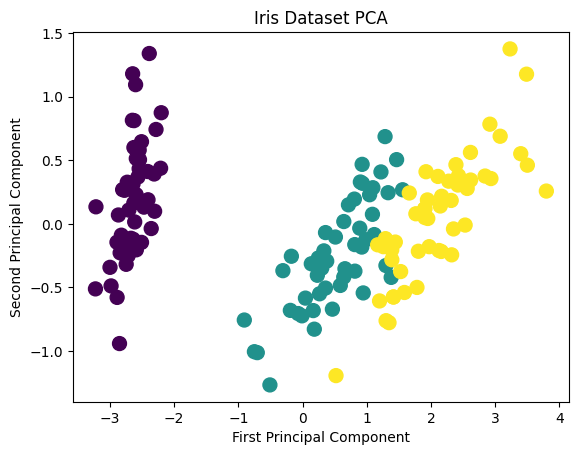

In [202]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# load dataset
iris = load_iris()
X = iris.data  # Feature matrix
y = iris.target  # Target vector

# apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# train classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# make predicions
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

# visualization
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=100)
plt.title("Iris Dataset PCA")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()
